## 워드 클라우드

In [1]:
!pip install wordcloud
!pip install nltk

In [2]:
# import requests
# from bs4 import BeautifulSoup

# def get_spurs_news(start, end=2):
#     results = []
#     for i in range(1, 9):
#         url = "https://search.naver.com/search.naver?&where=news&query=tottenham&start={}1"
#         r = requests.get(url)
#         bs = BeautifulSoup(r.text, "lxml")
#         trs = bs.select("div.news_area > a")
#         trs[0].get('title')
#         for tr in trs:
#             print(tr.get('title'))
#     return results

# print(get_spurs_news(2,15))

In [35]:
#처음엔 설치 필요!
#!pip install wordcloud
from wordcloud import WordCloud
import konlpy
import numpy as np
import pandas as pd
import re, os
import matplotlib.pyplot as plt
from PIL import Image                         # Pillow 패키지의 영상 핸들링 클래스.
%matplotlib inline

In [27]:
# 다음은 한번만 실행한다.
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [30]:
#os.chdir(r"..\data")
f = open("spurs.txt",'r',encoding='UTF8')
my_text = f.readlines()
f.close()

In [32]:
my_text_clean = []
for a_line in my_text:
    a_line = re.sub('\d+',' ', a_line)           # 수치 스페이스로 대체.
    a_line = re.sub('[-!?()>~.,]',' ',a_line)    # 특수문자 스페이스로 대체.
    a_line = re.sub('\n',' ',a_line)             # line return 스페이스로 대체.
    a_line = re.sub('[\[\]]', ' ',a_line)        # 대괄호 스페이스로 대체.
    a_line = re.sub('[a-zA-Z]',' ',a_line)       # 영문 스페이스로 대체.
    a_line = re.sub('ㅜ|ㅠ', ' ', a_line)        # 단모음 스페이스로 대체.
    a_line = re.sub('\s+', ' ', a_line)          # 잉여 스페이즈 줄임.
    my_text_clean += [a_line]

In [33]:
# 몇개만 출력해 본다.
my_text_clean[:5]

["'슈팅 개' 손흥민 경기째 골 침묵…토트넘 브라이턴에 덜미 ",
 '토트넘 골키퍼 가자니가 스페인 엘체로 임대 ',
 "'손흥민 풀타임' 토트넘 브라이튼에 패배 ",
 " 공식발표 토트넘 ' 옵션'으로 밀린 가사니가 스페인 엘체로 임대 ",
 "' 월 경기' 위기의 토트넘 케인 복귀만 기다린다 "]

In [36]:
hannanum = konlpy.tag.Hannanum()

In [37]:
# 명사 추출.
my_words = []
for a_line in my_text_clean:
    my_words += hannanum.nouns(a_line)

In [38]:
# 단음절 제거.
my_words_2 = []
for a_word in my_words:
    if len(a_word) > 1:
        my_words_2 += [a_word]

In [39]:
# Series 로 변환.
my_series = pd.Series(my_words_2)

In [40]:
# 도수 분포표. Top 20
my_word_counts = my_series.value_counts().sort_values(ascending=False)
my_word_counts[:20]

토트넘       108
임대         54
오피셜        36
스페         36
손흥민        36
침묵…토트넘     36
브라이튼       36
브라이턴       36
경기         18
패럿         18
시즌         18
'손흥민       18
덜미         18
가사니        18
토트넘전       18
솔직한        18
'토트넘       18
유효         18
재임대        18
이적         18
dtype: int64

In [41]:
# 다음은 워드클라우드의 요구사항.
a_long_sentence = ' '.join(my_words_2)

In [42]:
wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", background_color='white', max_words=30)              # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence)
wc.words_

{'침묵 토트넘': 1.0,
 '스페 임대': 1.0,
 '토트넘 브라이튼': 1.0,
 '슈팅 손흥민': 0.5,
 '손흥민 경기째': 0.5,
 '경기째 침묵': 0.5,
 '브라이턴 덜미': 0.5,
 '덜미 토트넘': 0.5,
 '토트넘 골키퍼': 0.5,
 '골키퍼 가자니': 0.5,
 '가자니 스페': 0.5,
 '임대 손흥민': 0.5,
 "손흥민 풀타임'": 0.5,
 "풀타임' 토트넘": 0.5,
 '브라이튼 패배': 0.5,
 '패배 공식발표': 0.5,
 '공식발표 토트넘': 0.5,
 '토트넘 옵션': 0.5,
 '옵션 가사니': 0.5,
 '가사니 스페': 0.5,
 '임대 경기': 0.5,
 '경기 위기': 0.5,
 '위기 토트넘': 0.5,
 '토트넘 복귀': 0.5,
 '복귀 토트넘전': 0.5,
 '토트넘전 노골': 0.5,
 '노골 선언': 0.5,
 '선언 솔직한': 0.5,
 '솔직한 손흥민': 0.5,
 '손흥민 침묵': 0.5}

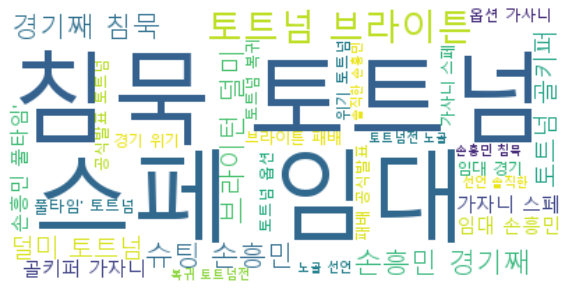

In [43]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # 축을 꺼줌.
plt.show()

In [44]:
# 백그라운드 마스크
#img = Image.open('background_1.png')                    # 타원형.
#img = Image.open('background_2.png')                   # 말풍선.
img = Image.open('circle.png')                    # 하트.
back_mask = np.array(img)

In [52]:
wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",background_color='black', max_words=30, mask=back_mask)            # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence) 

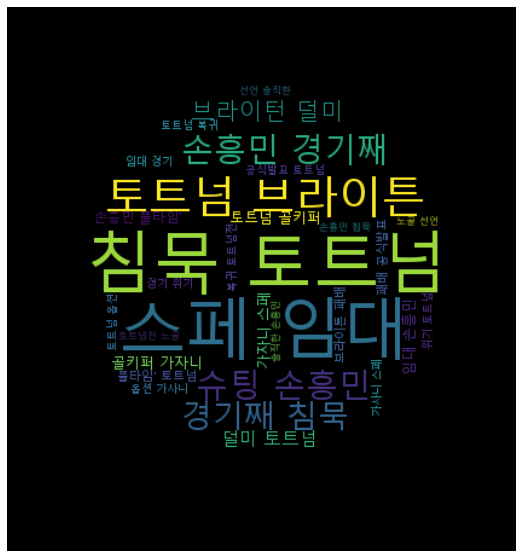

In [53]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # 축을 꺼줌.
plt.show()